In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load datasets
complaints_df = pd.read_csv("/Users/guytallent2/desktop/BIC Data/BIC_Complaints_Inquiries_20250612.csv")
violations_df = pd.read_csv("/Users/guytallent2/desktop/BIC Data/BIC_Issued_Violations_20250612.csv")

## Dataset Overview

In [3]:
print("Complaints/Inquiries shape:", complaints_df.shape)
print("Violations shape:", violations_df.shape)

complaints_df.head()

Complaints/Inquiries shape: (18542, 42)
Violations shape: (15488, 31)


,COMPLAINT/INQUIRY NUMBER,LICENSE TYPE,ACCOUNT NAME,BIC NUMBER,DATE COMPLAINT/INQUIRY REPORTED ON,INDUSTRY TYPE,ACCOUNT STATUS,SOURCE OF COMPLAINT/INQUIRY,COMPLAINT/INQUIRY DISPOSITION,COMPLAINT/INQUIRY STATUS,...,EXPORT DATE,Borough,Latitude,Longitide,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2012-00220,NaN,NaN,TWC-NaN,NaN,Trade Waste,NaN,WEB-MAIL,Resolved,Closed,...,2025-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INQ-195141,NaN,NaN,NaN,10/07/2019,Trade Waste,NaN,WEB-MAIL,Insufficient Information,Closed,...,2025-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01817,NaN,NaN,TWC-NaN,NaN,Trade Waste,NaN,311/PHONE - 9278,Unsubstantiated,Closed,...,2025-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01602,NaN,NaN,TWC-NaN,NaN,Trade Waste,NaN,311/PHONE - 9278,Resolved,Closed,...,2025-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-00298,NaN,NaN,TWC-NaN,NaN,Trade Waste,NaN,311/PHONE - 9278,Referred to Another Agency,Closed,...,2025-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Descriptive Statistics

In [4]:
violations_df.head()

,VIOLATION NUMBER,BIC NUMBER,ACCOUNT NAME,TYPE OF VIOLATION,VIOLATION PHASE,VIOLATION DISPOSITION,ACCOUNT TYPE,VIOLATION ACCOUNT ADDRESS,VIOLATION ACCOUNT CITY,VIOLATION ACCOUNT STATE,...,DESCRIPTION OF RULE,EXPORT DATE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,TWC-213153,476336.0,CALIXTO LANDSCAPING INC.,OATH,Issued,Settled,CL1,100 SPARTAN AVENUE,STATEN ISLAND,NY,...,Failure to comply with a Commission Directive,06/12/2025,40.625791,-74.165212,1.0,49.0,30302.0,5033440.0,5.016720e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
1,TWC-228791,507921.0,3KINGS CARTING LLC,OATH,Issued,Decision Reserved,License,2351 RICHMOND TERRACE,STATEN ISLAND,NY,...,An applicant for a license or a licensee must ...,06/12/2025,40.639741,-74.139400,1.0,49.0,207.0,5157710.0,5.011050e+09,Port Richmond
2,TWC-211327,NaN,SANITATION SALVAGE CORP.,OATH,Issued,Settled,Unlicensed,421 MANIDA STREET,BRONX,NY,...,Failed to comply with all applicable traffic l...,06/12/2025,40.808910,-73.886944,2.0,17.0,93.0,2000000.0,2.027710e+09,Hunts Point
3,TWC-227034,717.0,J.R.M. CONSTRUCTION CORP.,OATH,Issued,Settled,CL2 - Exempt,758 EAST 98 STREET,BROOKLYN,NY,...,"Upon issuance of a registration, the Commissio...",06/12/2025,40.651795,-73.908253,17.0,42.0,1098.0,3228511.0,3.081230e+09,East New York
4,TWC-218944,NaN,FINOCCHIO BROTHERS INC.,OATH,Issued,Settled,Unlicensed,49 LIBERTY PLACE,STAMFORD,CT,...,Failed to timely submit annual financial state...,06/12/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
complaints_df['NATURE OF COMPLAINT/INQUIRY'].value_counts().head(10)

NATURE OF COMPLAINT/INQUIRY
Information - All                         3170
Other - All                               2039
Unlicensed Carter - Trade Waste           1656
Misinformation - All                      1309
Quality of Life-Noise - Trade Waste       1289
Licensing - All                           1245
Service - All                              909
FOIL - All                                 604
Containers-Unremoved - Trade Waste         544
Quality of Life-Spillage - Trade Waste     461
Name: count, dtype: int64

In [6]:
violations_df['FINE AMOUNT'].describe()

count    1.361000e+04
mean     2.416376e+03
std      2.571296e+04
min      0.000000e+00
25%      2.500000e+02
50%      5.000000e+02
75%      2.000000e+03
max      1.300000e+06
Name: FINE AMOUNT, dtype: float64

## Trend Analysis

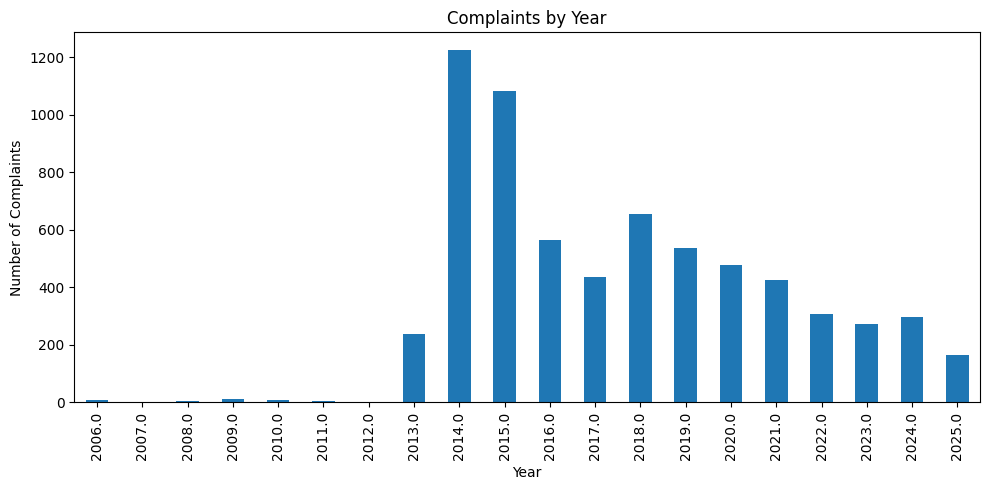

In [7]:
complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'] = pd.to_datetime(
    complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'], errors='coerce')
complaints_df['Report Year'] = complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'].dt.year

complaints_by_year = complaints_df.groupby('Report Year').size()

complaints_by_year.plot(kind='bar', figsize=(10, 5), title='Complaints by Year')
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()

## Borough-level Analysis

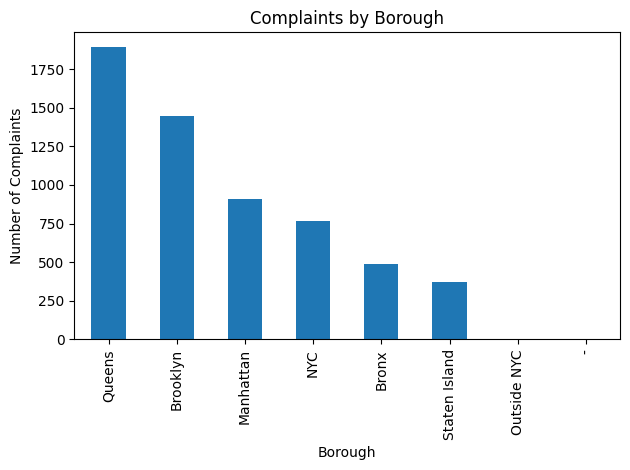

In [8]:
complaints_df['COMPLAINT/INQUIRY BOROUGH'].value_counts().plot(kind='bar', title='Complaints by Borough')
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()

## Cross-Dataset: Complaints vs Violations

In [9]:
complaints_per_account = complaints_df['ACCOUNT NAME'].value_counts()
violations_per_account = violations_df['ACCOUNT NAME'].value_counts()

# Merge on ACCOUNT NAME
account_comparison = pd.DataFrame({
    'Complaints': complaints_per_account,
    'Violations': violations_per_account
}).fillna(0)

account_comparison['Complaints'] = account_comparison['Complaints'].astype(int)
account_comparison['Violations'] = account_comparison['Violations'].astype(int)

account_comparison.sort_values(by='Complaints', ascending=False).head(10)

,Complaints,Violations
ACCOUNT NAME,,
ACTION CARTING ENVIRONMENTAL SERVICES INC.,552,254
"WASTE CONNECTIONS OF NEW YORK, INC.",267,88
ROYAL WASTE SERVICES INC.,206,301
CROWN WASTE CORP,201,45
"LIBERTY ASHES, INC.",179,89
MR. T CARTING CORP.,124,18
SANITATION SALVAGE CORP.,123,154
"CROWN CONTAINER TRANSFER STATION CO., INC.",121,0
"CITY WASTE SERVICES OF NEW YORK, INC.",116,105


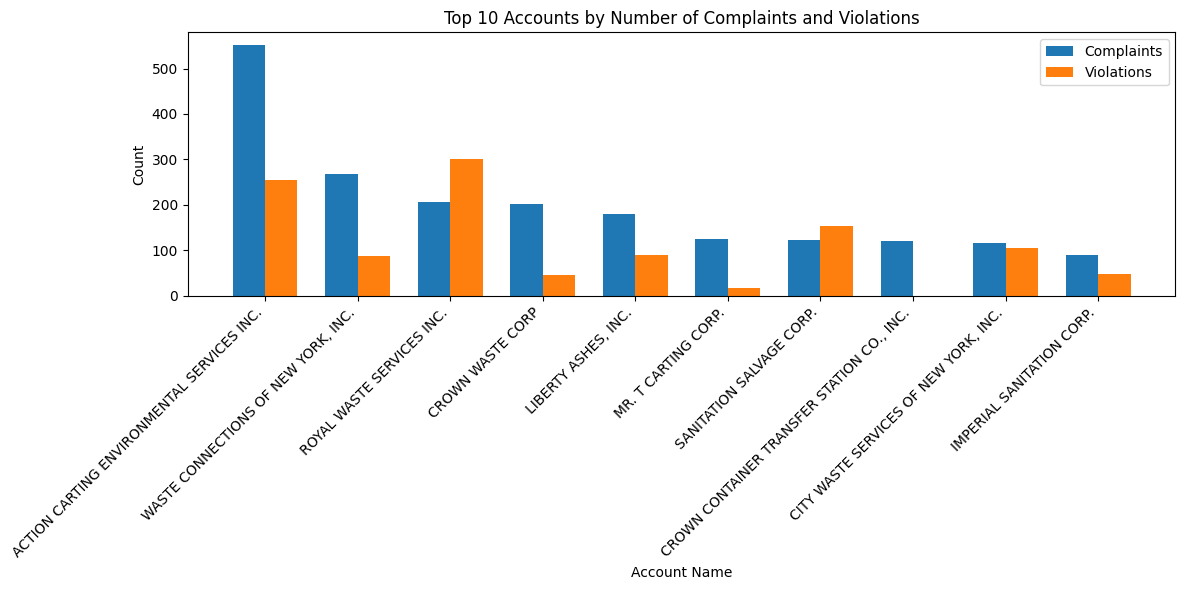

In [12]:
top10 = account_comparison.sort_values(by='Complaints', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top10))

plt.bar(index, top10['Complaints'], bar_width, label='Complaints')
plt.bar([i + bar_width for i in index], top10['Violations'], bar_width, label='Violations')

# Labels
plt.xlabel('Account Name')
plt.ylabel('Count')
plt.title('Top 10 Accounts by Number of Complaints and Violations')
plt.xticks([i + bar_width / 2 for i in index], top10.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Top Complaint Types

<Axes: title={'center': 'Top Complaint Types'}, ylabel='count'>

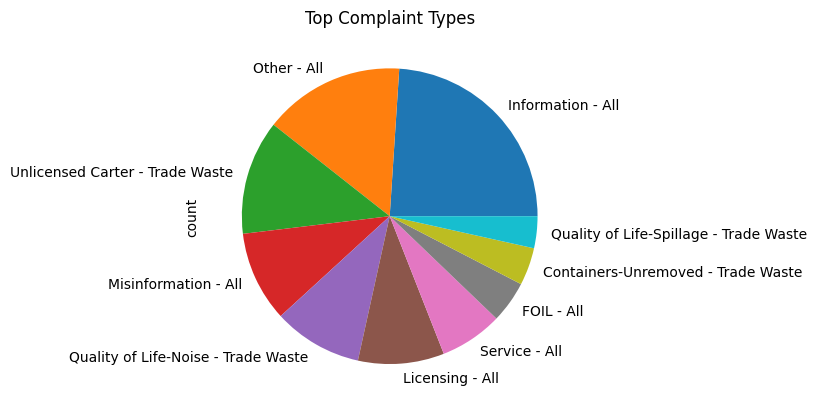

In [15]:
complaints_df['NATURE OF COMPLAINT/INQUIRY'].value_counts().head(10).plot(kind='pie', title='Top Complaint Types')

## Complaint Status Breakdown

<Axes: title={'center': 'Complaint Status'}, ylabel='count'>

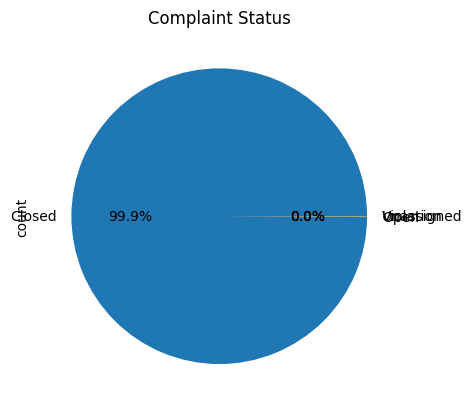

In [17]:
complaints_df['COMPLAINT/INQUIRY STATUS'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Complaint Status')

## Which Rules Are Violated The Most

<Axes: title={'center': 'Most Common Violation Rules'}, ylabel='RULE CODE'>

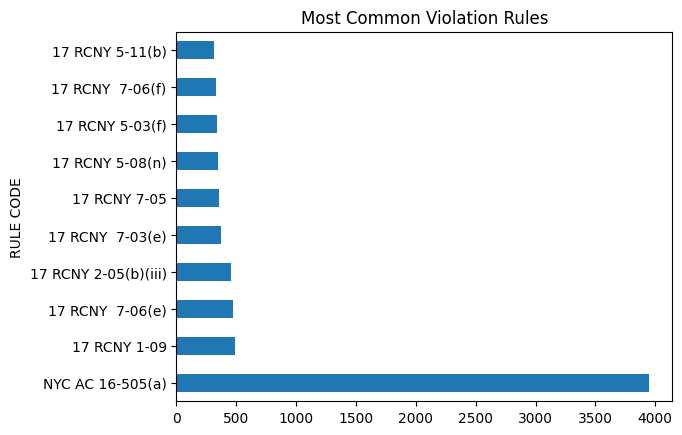

In [18]:
violations_df['RULE CODE'].value_counts().head(10).plot(kind='barh', title='Most Common Violation Rules')


## Time Based Trends

### Complaints Over Time

<Axes: title={'center': 'Complaints Over Time'}, xlabel='DATE COMPLAINT/INQUIRY REPORTED ON'>

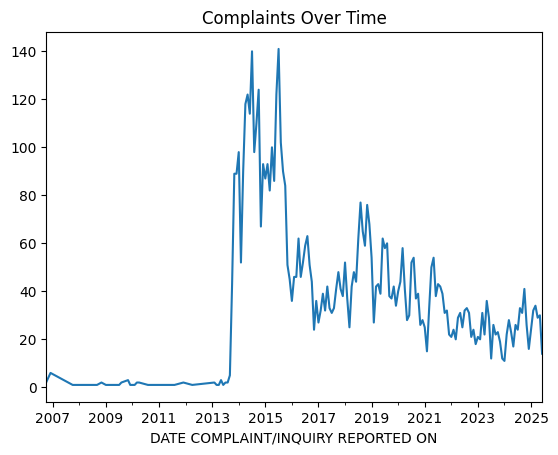

In [19]:
complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'] = pd.to_datetime(complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'], errors='coerce')
complaints_df.groupby(complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'].dt.to_period('M')).size().plot(title='Complaints Over Time')

### Violations Over Time

/var/folders/t1/030kx8pn0gvf37kb0sgdpk0r0000gp/T/ipykernel_60975/653046809.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  violations_df.groupby(violations_df['DATE VIOLATION ISSUED'].dt.to_period('M')).size().plot(title='Violations Over Time')


<Axes: title={'center': 'Violations Over Time'}, xlabel='DATE VIOLATION ISSUED'>

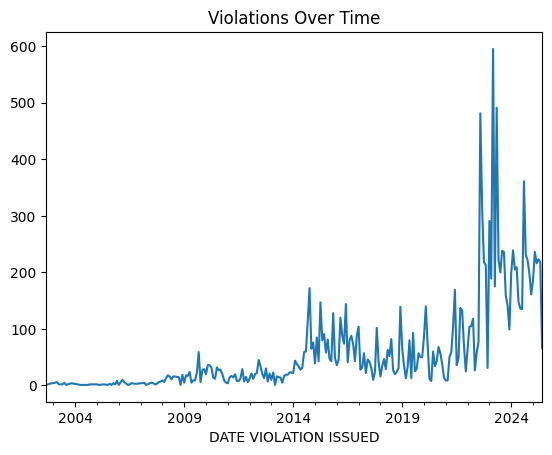

In [20]:
violations_df['DATE VIOLATION ISSUED'] = pd.to_datetime(violations_df['DATE VIOLATION ISSUED'], errors='coerce')
violations_df.groupby(violations_df['DATE VIOLATION ISSUED'].dt.to_period('M')).size().plot(title='Violations Over Time')

## Location Based Insights

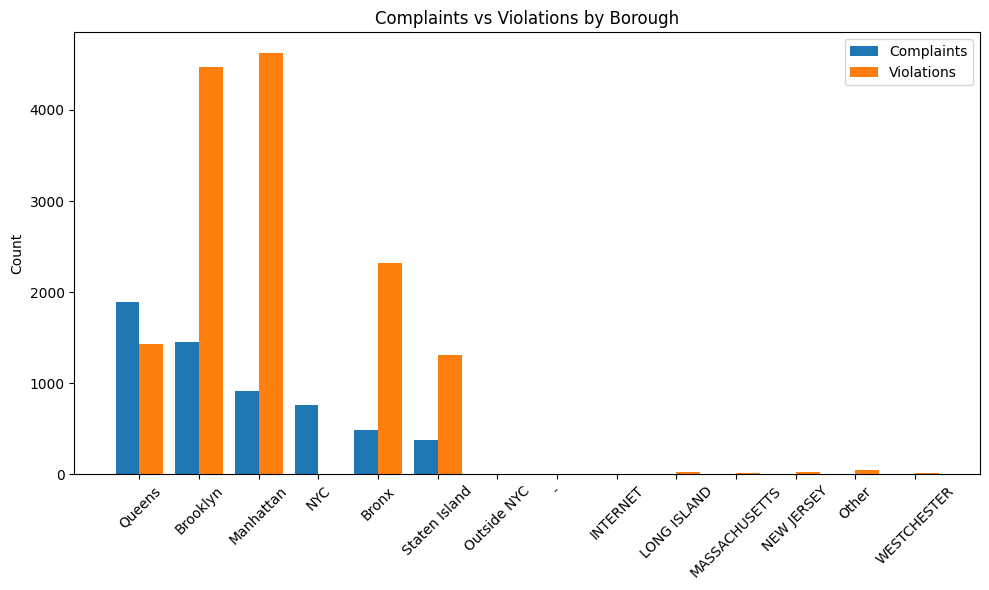

In [21]:
complaints_by_borough = complaints_df['COMPLAINT/INQUIRY BOROUGH'].value_counts()
violations_by_borough = violations_df['BOROUGH OF VIOLATION'].value_counts()

# Combine into a single DataFrame, aligning boroughs
borough_comparison = pd.DataFrame({
    'Complaints': complaints_by_borough,
    'Violations': violations_by_borough
}).fillna(0).astype(int)

# Sort by total volume
borough_comparison = borough_comparison.sort_values(by='Complaints', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(borough_comparison))

plt.bar(index, borough_comparison['Complaints'], width=bar_width, label='Complaints')
plt.bar([i + bar_width for i in index], borough_comparison['Violations'], width=bar_width, label='Violations')

# Labels
plt.xticks([i + bar_width / 2 for i in index], borough_comparison.index, rotation=45)
plt.ylabel("Count")
plt.title("Complaints vs Violations by Borough")
plt.legend()
plt.tight_layout()
plt.show()

## Fine & Settlement Analysis

<Axes: title={'center': 'Avg Fine by Violation Type'}, xlabel='TYPE OF VIOLATION'>

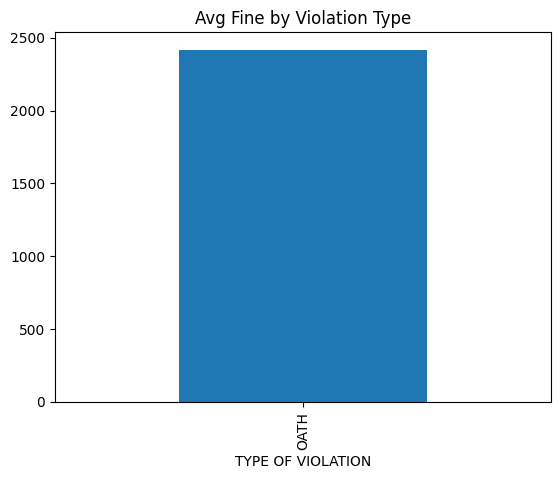

In [22]:
violations_df.groupby('TYPE OF VIOLATION')['FINE AMOUNT'].mean().dropna().plot(kind='bar', title='Avg Fine by Violation Type')

In [23]:
settled = violations_df['SETTLEMENT DATE'].notna().mean()
print(f"Settlement Rate: {settled:.2%}")

Settlement Rate: 20.22%


<Axes: title={'center': 'Complaints vs Violations per Account'}, xlabel='Complaints', ylabel='Violations'>

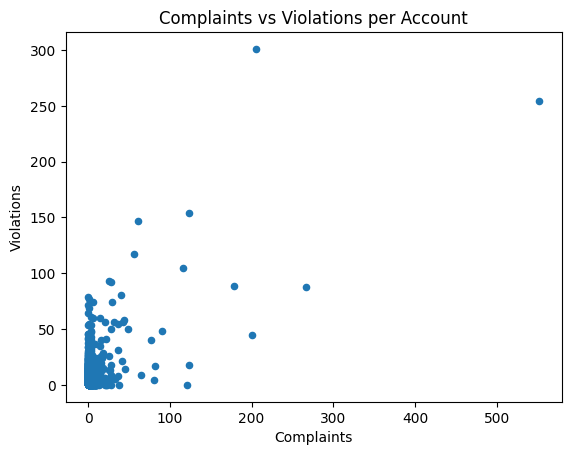

In [24]:
account_comparison.plot.scatter(x='Complaints', y='Violations', title='Complaints vs Violations per Account')


<Axes: title={'center': 'Response Time Distribution'}, ylabel='Frequency'>

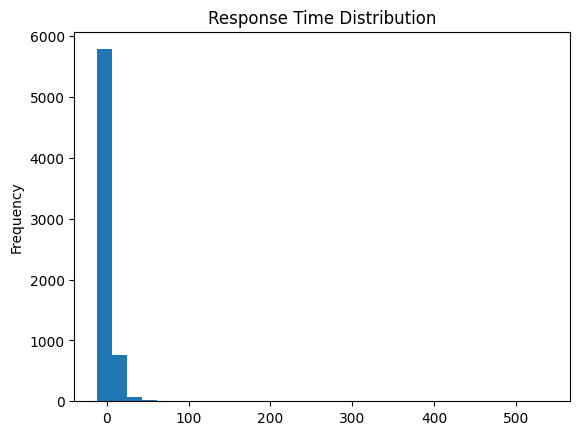

In [25]:
complaints_df['TOTAL RESPONSE TIME'].dropna().plot.hist(bins=30, title='Response Time Distribution')


In [28]:
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
for _, row in complaints_df.dropna(subset=['Latitude', 'Longitide']).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitide']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)
m

In [45]:
# Create the map centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

"""
# === Add Complaints ===
for _, row in complaints_df.dropna(subset=['Latitude', 'Longitide']).iterrows():
    complaint_type = str(row.get('NATURE OF COMPLAINT/INQUIRY', ''))
    description = str(row.get('DESCRIPTION', ''))
    complaint_date = str(row.get('DATE COMPLAINT/INQUIRY REPORTED ON', ''))
    complaint_year = pd.to_datetime(complaint_date, errors='coerce').year

    # Color by complaint type
    if 'Unlicensed' in complaint_type:
        color = '#e74c3c'
    elif 'Sanitation' in complaint_type:
        color = '#2ecc71'
    else:
        color = '#3498db'

    popup_text = f"""
    #<b>Type:</b> {complaint_type}<br>
    #<b>Description:</b> {description}<br>
    #<b>Date Reported:</b> {complaint_date} ({complaint_year})
    
"""
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitide']],
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)
"""

# === Add Violations ===
for _, row in violations_df.dropna(subset=['Latitude', 'Longitude']).iterrows():
    rule_desc = str(row.get('DESCRIPTION OF RULE', ''))
    violation_date = str(row.get('DATE VIOLATION ISSUED', ''))
    violation_year = pd.to_datetime(violation_date, errors='coerce').year
    fine_amount = row.get('FINE AMOUNT', 'N/A')
    settlement_date = str(row.get('SETTLEMENT DATE', 'N/A'))
    account_name = str(row.get('ACCOUNT NAME', ''))


    popup_text = f"""
    <b>Violation:</b> {rule_desc}<br>
    <b>Date Issued:</b> {violation_date} ({violation_year})<br>
    <b>Fine Amount:</b> ${fine_amount}
    <b>Settlement Date:</b> {settlement_date}
    """

    # Color by account name
    if 'ACTION CARTING ENVIRONMENTAL SERVICES INC.' in account_name:
        color = '#e74c3c'

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='#9b59b6',
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

# === Save the map ===
m.save("bic_complaints_violations_map.html")
print("Map saved to: bic_complaints_violations_map.html")

Map saved to: bic_complaints_violations_map.html


In [54]:
# === Find top 5 accounts with most violations ===
top_accounts = violations_df['ACCOUNT NAME'].value_counts().head(5).index.tolist()
print(top_accounts)

# Assign distinct colors to each of the top 5 accounts
account_colors = {
    top_accounts[0]: '#e74c3c',  # red
    top_accounts[1]: '#3498db',  # blue
    top_accounts[2]: '#2ecc71',  # green
    top_accounts[3]: '#f1c40f',  # yellow
    top_accounts[4]: '#9b59b6',  # purple
}

# Create the map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# === Add Violations ===
for _, row in violations_df.dropna(subset=['Latitude', 'Longitude']).iterrows():
    rule_desc = str(row.get('DESCRIPTION OF RULE', ''))
    violation_date = str(row.get('DATE VIOLATION ISSUED', ''))
    violation_year = pd.to_datetime(violation_date, errors='coerce').year
    fine_amount = row.get('FINE AMOUNT', 'N/A')
    settlement_date = str(row.get('SETTLEMENT DATE', 'N/A'))
    account_name = str(row.get('ACCOUNT NAME', ''))

    popup_text = f"""
    <b>Violation:</b> {rule_desc}<br>
    <b>Account:</b> {account_name}<br>
    <b>Date Issued:</b> {violation_date} ({violation_year})<br>
    <b>Fine Amount:</b> ${fine_amount}<br>
    <b>Settlement Date:</b> {settlement_date}
    """

    # Choose color: top 5 get specific colors, others use gray
    color = account_colors.get(account_name, '#7f8c8d')  # gray for others
    radius = 8 if top_accounts else 3
    opacity = 0.9 if top_accounts else 0.5

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

# === Save the map ===
m.save("bic_complaints_violations_map.html")
print("Map saved to: bic_complaints_violations_map.html")

['ROYAL WASTE SERVICES INC.', 'ACTION CARTING ENVIRONMENTAL SERVICES INC.', 'SANITATION SALVAGE CORP.', 'CENTURY WASTE SERVICES L.L.C.', 'METROPOLITAN PAPER RECYCLING, LLC']
Map saved to: bic_complaints_violations_map.html


/var/folders/t1/030kx8pn0gvf37kb0sgdpk0r0000gp/T/ipykernel_60975/1688635635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='Reds_r')


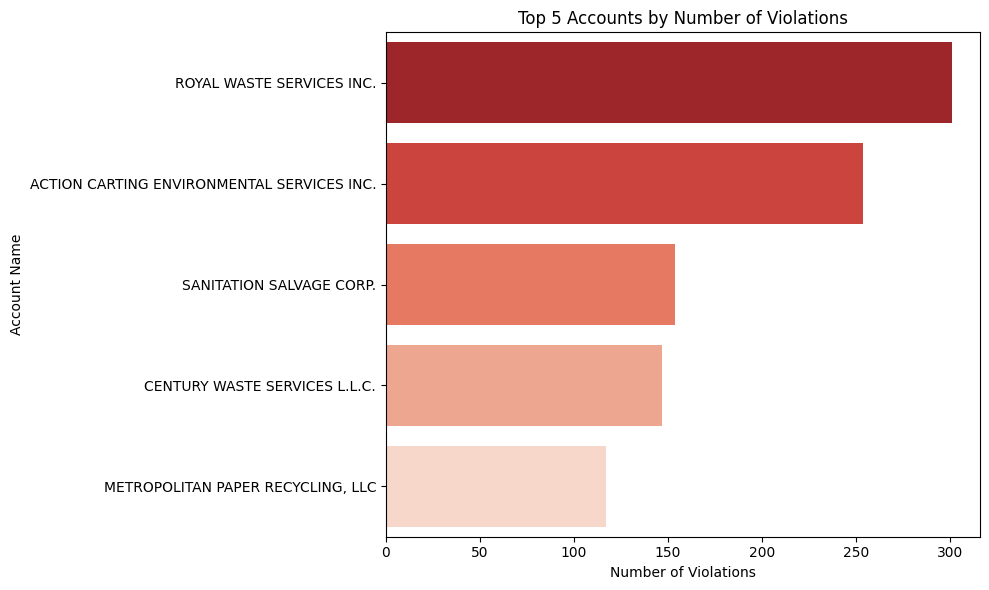

In [55]:
# Top 5 accounts with most violations
top_accounts = violations_df['ACCOUNT NAME'].value_counts().head(5)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='Reds_r')
plt.title("Top 5 Accounts by Number of Violations")
plt.xlabel("Number of Violations")
plt.ylabel("Account Name")
plt.tight_layout()
plt.show()